<a href="https://colab.research.google.com/github/traorekitio/gene-network-community-detection/blob/main/community_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link to the database used: https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.4.241/BIOGRID-ALL-4.4.241.tab3.zip

# Data loading and visualization

In [ ]:
import pandas as pd

In [ ]:
# Loading data
df = pd.read_csv('/content/BIOGRID-ALL-4.4.241.tab3.txt', sep='\t')
df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


In [ ]:
# Database size (rows, columns)
print(f"Taille de la base de données : {df.shape}")

# Column names
print(f"Noms des colonnes : {df.columns.tolist()}")

# Detailed information about the DataFrame
df.info()

Taille de la base de données : (85070, 37)
Noms des colonnes : ['#BioGRID Interaction ID', 'Entrez Gene Interactor A', 'Entrez Gene Interactor B', 'BioGRID ID Interactor A', 'BioGRID ID Interactor B', 'Systematic Name Interactor A', 'Systematic Name Interactor B', 'Official Symbol Interactor A', 'Official Symbol Interactor B', 'Synonyms Interactor A', 'Synonyms Interactor B', 'Experimental System', 'Experimental System Type', 'Author', 'Publication Source', 'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput', 'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database', 'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A', 'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B', 'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B', 'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories', 'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names', 'Ontology Term Types', 'Organism Name Interactor A

# Filtering to retain physical human interactions

In [ ]:

human_df = df[(df['Organism ID Interactor A'] == 9606) &
              (df['Organism ID Interactor B'] == 9606) &
              (df['Experimental System Type'] == 'physical')]
human_df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


# Construction of the graph

In [ ]:
import networkx as nx

# Creation of the graph
G = nx.from_pandas_edgelist(human_df, 'Official Symbol Interactor A', 'Official Symbol Interactor B')

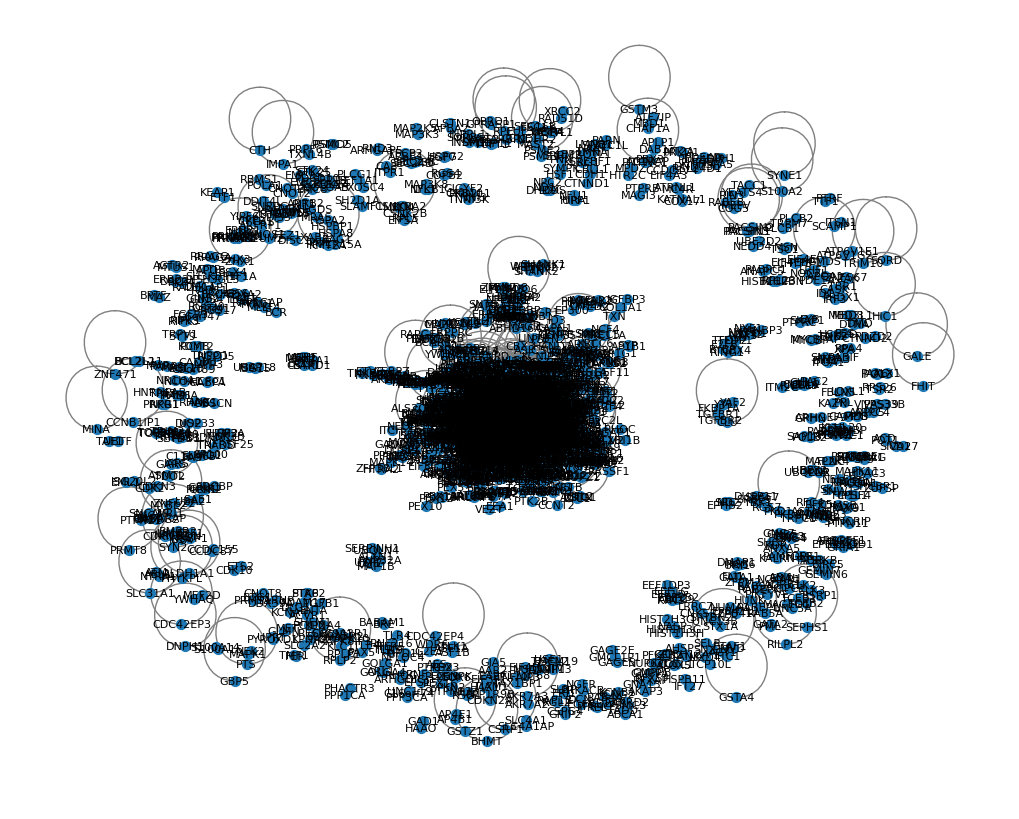

In [ ]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=50, font_size=8, edge_color="gray")

# Show graph
plt.show()

In [ ]:
#Community detection
import community.community_louvain as community_louvain  # Corrige l'importation

partition = community_louvain.best_partition(G)

# Added communities as a node attribute
nx.set_node_attributes(G, partition, 'community')

In [ ]:
# Analysis of results:
# Number of communities detected
num_communities = len(set(partition.values()))
print(f"Nombre de communautés détectées : {num_communities}")

Nombre de communautés détectées : 334


In [ ]:
# Size of communities
from collections import Counter
community_sizes = Counter(partition.values())
print("Taille des communautés :", community_sizes)

Taille des communautés : Counter({22: 196, 49: 161, 20: 142, 6: 120, 29: 105, 13: 87, 21: 73, 37: 72, 7: 71, 25: 68, 69: 63, 57: 56, 85: 53, 8: 52, 100: 49, 212: 48, 31: 46, 4: 43, 15: 43, 26: 41, 115: 29, 124: 27, 129: 27, 24: 21, 87: 20, 10: 17, 30: 15, 80: 14, 252: 11, 66: 8, 17: 7, 40: 7, 65: 7, 90: 7, 167: 7, 233: 7, 1: 6, 35: 6, 71: 6, 101: 6, 130: 6, 146: 6, 168: 6, 172: 6, 28: 5, 56: 5, 113: 5, 126: 5, 160: 5, 191: 5, 232: 5, 12: 4, 43: 4, 47: 4, 48: 4, 51: 4, 54: 4, 55: 4, 61: 4, 62: 4, 83: 4, 96: 4, 104: 4, 116: 4, 127: 4, 148: 4, 185: 4, 202: 4, 248: 4, 258: 4, 280: 4, 2: 3, 38: 3, 39: 3, 41: 3, 42: 3, 58: 3, 59: 3, 64: 3, 75: 3, 84: 3, 93: 3, 97: 3, 102: 3, 106: 3, 107: 3, 108: 3, 112: 3, 114: 3, 123: 3, 128: 3, 139: 3, 140: 3, 142: 3, 145: 3, 150: 3, 152: 3, 153: 3, 157: 3, 190: 3, 192: 3, 199: 3, 203: 3, 205: 3, 208: 3, 209: 3, 215: 3, 216: 3, 243: 3, 245: 3, 251: 3, 254: 3, 255: 3, 259: 3, 262: 3, 269: 3, 270: 3, 276: 3, 277: 3, 279: 3, 284: 3, 292: 3, 297: 3, 323: 3, 15

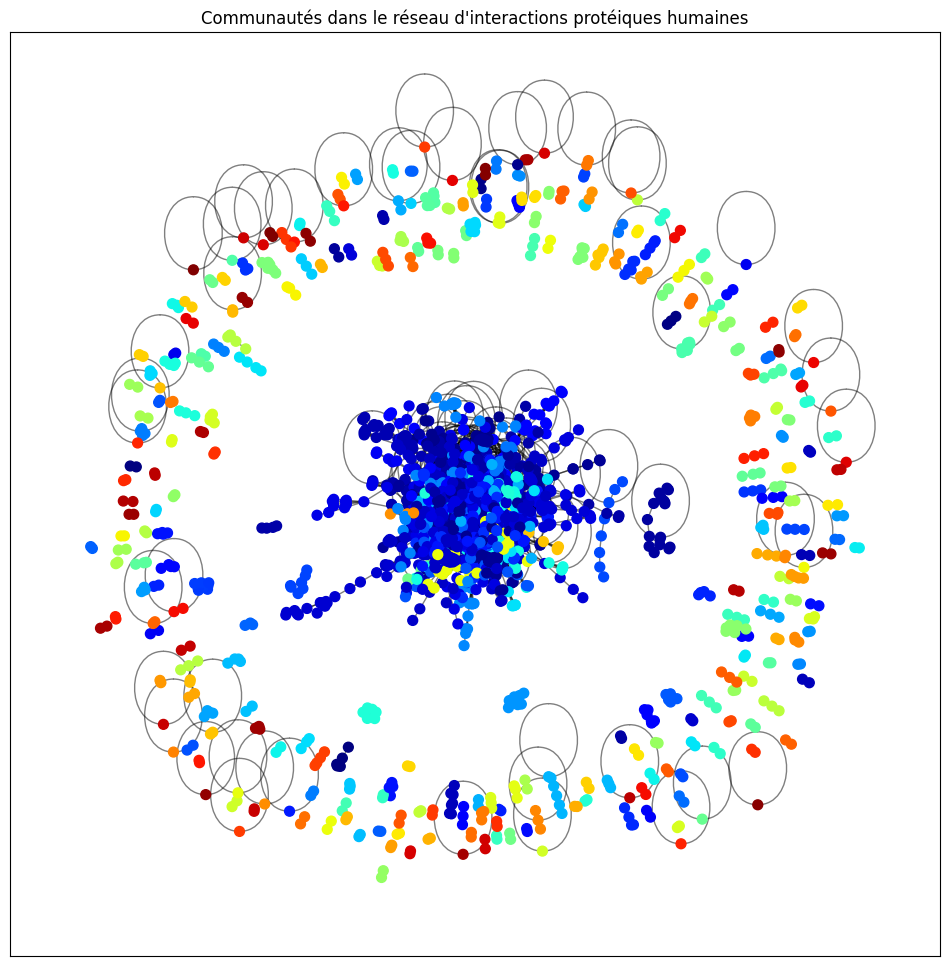

In [ ]:

# Assignment of colors to communities
colors = [partition[node] for node in G.nodes()]

# Drawing the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.jet, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communautés dans le réseau d'interactions protéiques humaines")
plt.show()

# Assessment

In [ ]:
#Modularity
from networkx.algorithms.community import modularity

modularity_score = modularity(G, [set([node for node in partition if partition[node] == c]) for c in set(partition.values())])
print(f"Modularité du partitionnement : {modularity_score:.4f}")


Modularité du partitionnement : 0.7096


It measures the strength of the detected communities by comparing the internal and external connections of the clusters. We obtained a value of 0.71 which is a high value indicating good separation of communities.

In [ ]:
# Conductance

from networkx.algorithms.cuts import conductance

# Example with the largest community detected
largest_community = max(set(partition.values()), key=list(partition.values()).count)
nodes_in_largest_community = {node for node, comm in partition.items() if comm == largest_community}

conductance_score = conductance(G, nodes_in_largest_community)
print(f"Conductance de la plus grande communauté : {conductance_score:.4f}")


Conductance de la plus grande communauté : 0.3425


Conductance assesses the relationship between a community’s internal and external connections. A low conductance such as that obtained at 0.3425 indicates better community cohesion.

In [ ]:
import random

random_partition = {node: random.randint(0, num_communities - 1) for node in G.nodes()}
random_modularity = modularity(G, [set([node for node in random_partition if random_partition[node] == c]) for c in set(random_partition.values())])

print(f"Modularité de la partition aléatoire : {random_modularity:.4f}")


Modularité de la partition aléatoire : 0.0444


We therefore obtain a modularity of the random partition that is low compared to that of our network.